<a href="https://colab.research.google.com/github/Jenn-mawia/sales-forecasting/blob/main/Walmart_Sales_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing libraries 
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics


from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor




In [ ]:
# reading the data

stores = pd.read_csv("stores.csv")
features = pd.read_csv("features.csv")
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

# Checking the data & cleaning

## **Stores Dataset**

In [ ]:
# check the shape of the dataset
print(stores.shape)
# check the top of the dataset
stores.head()

# There are different types of stores - investigate how many stores exist and how many types of stores are there
# There are 45 stores and 3 types of stores

(45, 3)


,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [ ]:
stores.Store.unique()

# a total of 45 stores

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45])

In [ ]:
# check the datatypes
print("Data types:")
print(stores.dtypes)
print("...................")
# number of stores
print("Number of stores:",stores['Store'].count())
print("...................")

# how many types of stores exist
print("Types of stores:" ,stores['Type'].unique())
print("...................")

# number of missing values
print("Missing values:")
print(stores.isnull().sum())

Data types:
Store     int64
Type     object
Size      int64
dtype: object
...................
Number of stores: 45
...................
Types of stores: ['A' 'B' 'C']
...................
Missing values:
Store    0
Type     0
Size     0
dtype: int64


There are 45 stores and 3 types of stores A, B, C 
- Investigate if the different types of stores register different amount of sales i.e. are the types of stores classified based on the amount of sales they register??
- Investigate if the types of stores are classified based on their sizes

>The Type column can be converted to categorical format/encoded for easier handling in machine learning models

>There are no missing values in this dataset


In [ ]:
stores.groupby(['Type']).agg({'Size': 'mean', 'Type': 'count'})


,Size,Type
Type,,
A,177247.727273,22
B,101190.705882,17
C,40541.666667,6


There seems to be a relationship. It looks like Type 'A' are relatively huge stores, type 'B' are medium-sized stores while type 'C' are smaller stores. This could be related to the weekly sales registered for the different types of stores

>The smaller stores (C) are fewer than larger stores (A)

## **Features dataset**

In [ ]:
# # check the shape of the dataset
print(features.shape)

features.head()
# IsHoliday has Boolean datatype

(8190, 12)


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


There are a total of 8190 entries of data and 12 columns that can effectively be used to gauge the weekly sales of a particular store. 

There are some null values on the Markdown data - check the percentage of missing data


In [ ]:
# check the datatypes
print("Data types:")
print(features.dtypes)
print("...................")

# number of missing values
print("Missing values:")
print(features.isnull().sum() * 100 / len(features))



Data types:
Store             int64
Date             object
Temperature     float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CPI             float64
Unemployment    float64
IsHoliday          bool
dtype: object
...................
Missing values:
Store            0.000000
Date             0.000000
Temperature      0.000000
Fuel_Price       0.000000
MarkDown1       50.769231
MarkDown2       64.334554
MarkDown3       55.885226
MarkDown4       57.704518
MarkDown5       50.549451
CPI              7.142857
Unemployment     7.142857
IsHoliday        0.000000
dtype: float64


The date column is an object -> convert it to Date\Time format.

IsHoliday column is of Boolean datatype -> which can be converted to numerical values later during modeling

The are more missing values in the markdown data (>50% of the data) than in the CPI and Unemployment (<10% of the data) -> removing the missing data may be costly on machine learning models, hence look for ways of **imputing**

Most null values are present in the Markdown fields because these are promotional/discount data, hence not always present. Promotions/discounts are run for specific periods of time during the year.  This data is also only available after 2011, so all markdown data before this period is null






In [ ]:
# Converting date and IsHoliday

features['Date'] = pd.to_datetime(features['Date'])
features['IsHoliday'].replace({False:0, True:1}, inplace=True)
# check datatypes after conversion
print(features.dtypes)
features.head()

Store                    int64
Date            datetime64[ns]
Temperature            float64
Fuel_Price             float64
MarkDown1              float64
MarkDown2              float64
MarkDown3              float64
MarkDown4              float64
MarkDown5              float64
CPI                    float64
Unemployment           float64
IsHoliday                int64
dtype: object


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,1
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,0
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,0
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,0


In [ ]:
# fill CPI & Unemployment rate with the mean
# CPI - the consumer price index
# Unemployment - the unemployment rate
features['CPI'].fillna((features['CPI'].mean()), inplace=True)
features['Unemployment'].fillna(features['Unemployment'].mean(), inplace=True)

# fill missing markdown datatypes with 0 because the data is only available after  Nov 2011. 
# We cannot make any assumptions about the markdown data
features = features.fillna(0)

# check missing values after filling
print(features.isnull().sum() * 100 / len(features))


Store           0.0
Date            0.0
Temperature     0.0
Fuel_Price      0.0
MarkDown1       0.0
MarkDown2       0.0
MarkDown3       0.0
MarkDown4       0.0
MarkDown5       0.0
CPI             0.0
Unemployment    0.0
IsHoliday       0.0
dtype: float64


In [ ]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0
1,1,2010-02-12,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,1
2,1,2010-02-19,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,0
3,1,2010-02-26,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,0
4,1,2010-03-05,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,0


In [ ]:
# check the time span of the features dataset
print('start date: ', features['Date'].min())
print('end date: ', features['Date'].max())

# compare these dates with the train and test datasets to see if they span the same periods

start date:  2010-02-05 00:00:00
end date:  2013-07-26 00:00:00


Investigate the variance in Temperature, Fuel_Price, CPI, Unemployment because it is expected that these variables are huge factors/drivers towards consumption rate. 

E.g. when it is really hot, most customers will buy cool drinks and or refreshments while when the temperatures are cold, they will buy more warm clothes, heaters, more hot drinks to help keep warm. 

If fuel prices are high, consumers tend to spend a little bit less than when the prices are lower because fuel prices is a factor to the cost of living. 

Higher unemployment rates also mean that there are lower purchases. If a huge population is employed, it means they will at least have some extra money to spend and hence more sales. 


In [ ]:
# calculate the variance and sort in descending order
var = features[['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']].var().sort_values(ascending = False)
var.head()


CPI             1466.326937
Temperature      348.890354
Unemployment       3.272348
Fuel_Price         0.186051
dtype: float64

As expected, CPI and Temperature have the highest variance. 
- Temperature because there are seasons of extremly low temperatures and other seasons with really high temperature. 
- CPI - this is in direct relation with inflation rate which is usually variant every year depending on the rate of economic growth the country/region is facing. 

* Investigate to see if this is related to the sales figures in any way

**When the CPI is rising it means that consumer prices are also rising, and when it falls it means consumer prices are generally falling. In short, a higher CPI indicates higher inflation, while a falling CPI indicates lower inflation, or even deflation.**

## **Train Dataset**

In [ ]:
# # check the shape of the dataset
print(train.shape)

train.head()
# IsHoliday has Boolean datatype

(421570, 5)


,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


There are 421,000+ entries of data with 5 columns. The target here is the Weekly Sales column. 

In [ ]:
# check the datatypes
print("Data types:")
print(train.dtypes)
print("...................")

# number of missing values
print("Missing values:")
print(train.isnull().sum() * 100 / len(features))



Data types:
Store             int64
Dept              int64
Date             object
Weekly_Sales    float64
IsHoliday          bool
dtype: object
...................
Missing values:
Store           0.0
Dept            0.0
Date            0.0
Weekly_Sales    0.0
IsHoliday       0.0
dtype: float64


There are no missing values in this dataset. 

There is a "Date" column and "IsHoliday" column similar to the one on the features dataset - compare the timespan 

In [ ]:
# Converting date and IsHoliday datatypes

train['Date'] = pd.to_datetime(train['Date'])
train['IsHoliday'].replace({False:0, True:1}, inplace=True)
print(train.dtypes)
train.head()

Store                    int64
Dept                     int64
Date            datetime64[ns]
Weekly_Sales           float64
IsHoliday                int64
dtype: object


,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,0
1,1,1,2010-02-12,46039.49,1
2,1,1,2010-02-19,41595.55,0
3,1,1,2010-02-26,19403.54,0
4,1,1,2010-03-05,21827.90,0


In [ ]:
print('Start date: ', train['Date'].min())
print('End date: ', train['Date'].max())


Start date:  2010-02-05 00:00:00
End date:  2012-10-26 00:00:00


The features dataset spans a longer period than the train dataset: 


*   Features dataset: 2010-02-05 to 2013-**07**-26 
*   Train dataset: 2010-02-05 to 2012-**10**-26



**Number of departments per store**

In [ ]:
departments = train.groupby(['Store']).agg({'Dept':'count'}).sort_values('Dept', ascending = False)
departments

,Dept
Store,
13,10474
10,10315
4,10272
1,10244
2,10238
24,10228
27,10225
34,10224
20,10214


## **Test Dataset**

In [ ]:
# # check the shape of the dataset
print(test.shape)

test.head()

(115064, 4)


,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


The test dataset is much smaller than the train dataset with 115064 entries of data and 4 columns. It will only be used during testing the model. 

In [ ]:
# check the datatypes
print("Data types:")
print(test.dtypes)
print("...................")

# number of missing values
print("Missing values:")
print(test.isnull().sum() * 100 / len(features))

# there are no missing values in the test dataset too

Data types:
Store         int64
Dept          int64
Date         object
IsHoliday      bool
dtype: object
...................
Missing values:
Store        0.0
Dept         0.0
Date         0.0
IsHoliday    0.0
dtype: float64


In [ ]:
print('Start date: ', test['Date'].min())
print('End date: ', test['Date'].max())

Start date:  2012-11-02
End date:  2013-07-26


The features dataset spans a longer period than the train dataset:

Features dataset: **2010-02-05 to 2013-07-26** (February 2010 to July 2013)

Train dataset: **2010-02-05 to 2012-10-26** (February 2010 to October 2012)

Test datset: **2012-11-02 to 2013-07-26** (November 2012 to July 2013)

Perform the same data transformations as we did in the train dataset. 

In [ ]:
# converting date and IsHoliday datatypes
test['Date'] = pd.to_datetime(test['Date'])
test['IsHoliday'].replace({False:0, True:1}, inplace=True)
print(test.dtypes)
test.head()

Store                 int64
Dept                  int64
Date         datetime64[ns]
IsHoliday             int64
dtype: object


,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,0
1,1,1,2012-11-09,0
2,1,1,2012-11-16,0
3,1,1,2012-11-23,1
4,1,1,2012-11-30,0


## **Check for any duplicated entries**

In [ ]:
# check for any duplicate entries
print("Duplicated entries - Features dataset:" + str(features.duplicated().sum()))
print("Duplicated entries - Stores dataset:" + str(stores.duplicated().sum()))
print("Duplicated entries - Train dataset:" + str(train.duplicated().sum()))
print("Duplicated entries - Test dataset:" + str(test.duplicated().sum()))


Duplicated entries - Features dataset:0
Duplicated entries - Stores dataset:0
Duplicated entries - Train dataset:0
Duplicated entries - Test dataset:0


# **Feature Engineering on the Date Column**

Separate the date column so that there is day of the week, year ,month and week number. This will help to perform data analysis on the date column effectively and also make modelling easier. 

In [ ]:
# extract the year, month, day of the week and week number
train['year'] = train['Date'].dt.year
train['month'] = train['Date'].dt.month
train['month_name'] = train['Date'].dt.month_name()
train['day_of_the_week'] = train['Date'].dt.day_name()
train['week_number'] = ((train['Date'].dt.isocalendar().week)*1.0).astype(int) 

train.head()


,Store,Dept,Date,Weekly_Sales,IsHoliday,year,month,month_name,day_of_the_week,week_number
0,1,1,2010-02-05,24924.50,0,2010,2,February,Friday,5
1,1,1,2010-02-12,46039.49,1,2010,2,February,Friday,6
2,1,1,2010-02-19,41595.55,0,2010,2,February,Friday,7
3,1,1,2010-02-26,19403.54,0,2010,2,February,Friday,8
4,1,1,2010-03-05,21827.90,0,2010,3,March,Friday,9


**Perform the same transformation on the test dataset**

In [ ]:
test.head()

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,0
1,1,1,2012-11-09,0
2,1,1,2012-11-16,0
3,1,1,2012-11-23,1
4,1,1,2012-11-30,0


In [ ]:
# extract the year, month, day of the week and week number
test['year'] = test['Date'].dt.year
test['month'] = test['Date'].dt.month
test['month_name'] = test['Date'].dt.month_name()
test['day_of_the_week'] = test['Date'].dt.day_name()
test['week_number'] = ((test['Date'].dt.isocalendar().week)*1.0).astype(int) 

test.head()

,Store,Dept,Date,IsHoliday,year,month,month_name,day_of_the_week,week_number
0,1,1,2012-11-02,0,2012,11,November,Friday,44
1,1,1,2012-11-09,0,2012,11,November,Friday,45
2,1,1,2012-11-16,0,2012,11,November,Friday,46
3,1,1,2012-11-23,1,2012,11,November,Friday,47
4,1,1,2012-11-30,0,2012,11,November,Friday,48


# Exploratory Data Analysis & Visualizations

## **Merge the datasets**

In [ ]:
# merge the datasets
# features & train data on stores and date 
# remove one column containing the 'IsHoliday' data from features dataset because it is also present in the train dataset
features = features.drop('IsHoliday', axis = 1) 
print(features.columns)
features_train = pd.merge(train, features, how = 'left', on=('Store', 'Date')) # left join
print(features_train.shape)
features_train.head()

Index(['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment'],
      dtype='object')
(421570, 19)


,Store,Dept,Date,Weekly_Sales,IsHoliday,year,month,month_name,day_of_the_week,week_number,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,0,2010,2,February,Friday,5,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106
1,1,1,2010-02-12,46039.49,1,2010,2,February,Friday,6,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106
2,1,1,2010-02-19,41595.55,0,2010,2,February,Friday,7,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106
3,1,1,2010-02-26,19403.54,0,2010,2,February,Friday,8,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106
4,1,1,2010-03-05,21827.90,0,2010,3,March,Friday,9,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106


In [ ]:
# merge the features_train dataset and the stores data
feat_store_train = pd.merge(stores,features_train, how = 'right', on = 'Store')#right join
print(feat_store_train.shape)
feat_store_train.head()

(421570, 21)


,Store,Type,Size,Dept,Date,Weekly_Sales,IsHoliday,year,month,month_name,...,week_number,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,A,151315,1,2010-02-05,24924.50,0,2010,2,February,...,5,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106
1,1,A,151315,1,2010-02-12,46039.49,1,2010,2,February,...,6,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106
2,1,A,151315,1,2010-02-19,41595.55,0,2010,2,February,...,7,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106
3,1,A,151315,1,2010-02-26,19403.54,0,2010,2,February,...,8,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106
4,1,A,151315,1,2010-03-05,21827.90,0,2010,3,March,...,9,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106


In [ ]:
data = feat_store_train # to prevent overwriting the last and final dataset
data.dtypes

arima = data #save this data so that it can be used in future to for arima modelling

## **Weekly Sales Analysis throughout the period**

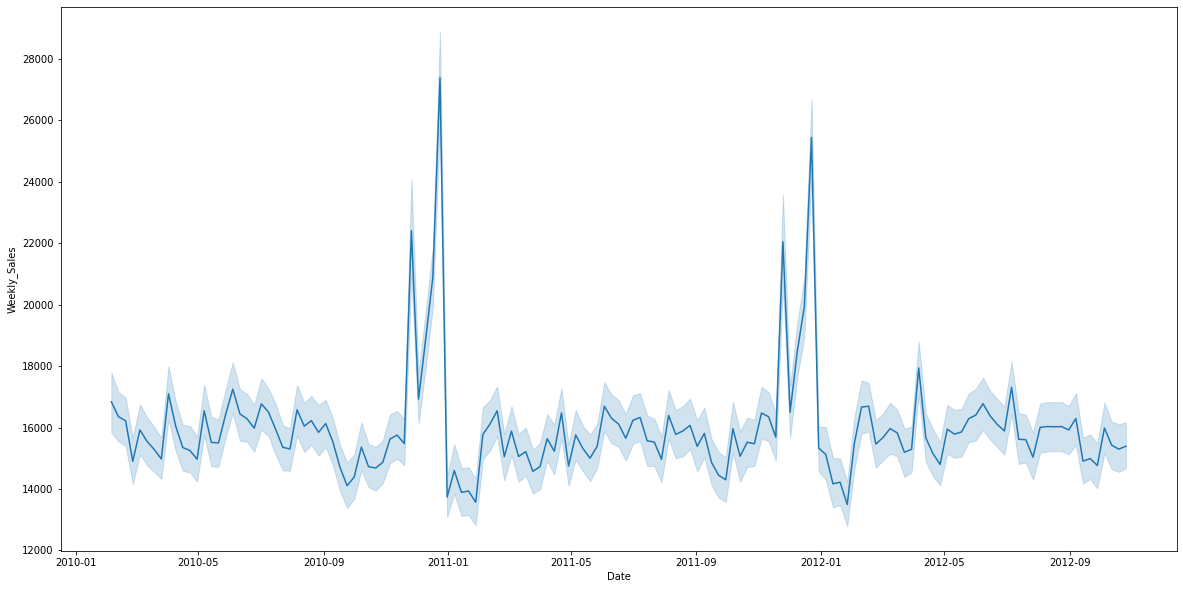

In [ ]:
# plot the weekly sales data to check for trends and seasonality
plt.figure(figsize=(20,10))

sns.lineplot(x=data['Date'], y=data['Weekly_Sales'])
plt.show()

From the graph, there are significant peaks and dips throughout the period. 
> The peaks are seen towards the end of each year suggesting increased purchases during Thanksgiving and Christmas holiday. We do not have data for the whole of 2012 and hence there are no significant peaks during this time. 

> The dips are consecutively seen during the start of the year just as the purchases reduce as the festive seasons end.  

## **Weekly sales per store**

In [ ]:
# get the weekly sales aggregate by store and the type of store 
weekly_sales = data.groupby(['Type', 'Store']).agg({'Weekly_Sales':['min', 'max', 'mean']}).sort_values(by = [('Weekly_Sales', 'max')], ascending = False)
weekly_sales

Weekly_Sales                         
                    min        max          mean
Type Store                                      
B    10         -798.00  693099.36  26332.303819
     35        -3924.00  649770.18  13803.596986
A    14         -498.00  474330.10  28784.851727
     20         -798.00  422306.25  29508.301592
     27         -409.00  420586.57  24826.984536
B    22         -175.54  393705.20  15181.218886
A    4          -898.00  385051.04  29161.210415
B    23         -298.00  369830.98  19776.180881
     12         -598.00  360140.66  14867.308619
A    28        -4988.94  355356.39  18714.889803
B    18         -259.00  353008.64  15733.313136
A    39         -159.00  351553.98  21000.763562
     6          -698.00  342578.65  21913.243624
     19         -649.00  339846.03  20362.126734
B    15         -179.00  292555.25   9002.493073
A    13          -98.00  292165.78  27355.136891
     41         -279.00  290809.17  17976.004648
     2         -1098.00  285353.53  26898.070031
     31         -224.00  274558.07  19681.907464
B    29         -300.00  266480.63   8158.810609
A    11         -594.00  245767.47  19276.762751
B    21         -450.00  244640.55  11283.435496
     45        -1750.00  240758.86  11662.897315
A    24         -109.00  233371.62  18969.106500
B    7          -459.00  222921.09   8358.766148
A    32         -698.00  220379.93  16351.621855
     1          -863.00  203670.47  21710.543621
B    25          -99.87  198719.71  10308.157810
A    26          -79.00  196615.87  14554.129672
B    17         -259.00  194660.52  12954.393636
A    34         -598.00  161262.15  13522.081671
B    3         -1008.96  155897.94   6373.033983
A    8          -100.00  153431.69  13133.014768
     40         -543.00  145504.24  13763.632803
B    9          -496.00  139427.43   8772.890379
     16        -1699.00  129372.97   7863.224124
C    42         -379.00  112152.35  11443.370118
     43         -372.90  108517.42  13415.114118
     38         -153.12  100618.04   7492.478460
     37          -64.38   99514.86  10297.355026
B    5          -101.26   93517.72   5053.415813
C    30          -26.61   80457.01   8764.237719
A    36         -419.28   78974.83   8584.412563
C    44         -132.46   66629.98   6038.929814
A    33          -39.76   49129.77   5728.414053

All stores register negative values in their sales (min column)

Comparing Maximum weekly sales registered per store with the Type of stores, **the type C stores are seen to register the lowest sales**

**Average Weekly sales per store**

In [ ]:
# group the average sales data by type of store
type_sales = data.groupby('Type').agg({'Weekly_Sales' : 'mean'})
type_sales
type_sales.reset_index(inplace = True)
# round off the weekly sales value 
type_sales['Weekly_Sales'] = type_sales['Weekly_Sales'].round()
type_sales

,Type,Weekly_Sales
0,A,20100.0
1,B,12237.0
2,C,9520.0


In [ ]:
# make an interactive plot of the data
fig = px.bar(type_sales, x='Type', y='Weekly_Sales', color = 'Weekly_Sales',color_continuous_scale=["gray", "green"],text_auto=True )
fig.update_layout(title='Average Weekly Sales per Store Type')
fig.show()

# The Store type has a big influence on the Weekly sales - confirm this with a correlation plot

**Average weekly sales per department**

In [ ]:
# group the average sales data by department
dept_sales = data.groupby('Dept').agg({'Weekly_Sales' : 'mean'}).sort_values(by='Weekly_Sales', ascending = False)
dept_sales.reset_index(inplace = True)
print(dept_sales)

# make a plot of this data
fig = px.bar(dept_sales, x='Dept', y='Weekly_Sales', color = 'Weekly_Sales', text_auto=True)
fig.update_layout(barmode = 'relative', title_text = 'Average Department Sales')

fig.update_layout(
    margin=dict(l=20, r=20, t=40, b=20),
    paper_bgcolor="LightSteelBlue",
)

fig.show()

    Dept  Weekly_Sales
0     92  75204.870531
1     95  69824.423080
2     38  61090.619568
3     72  50566.515417
4     65  45441.706224
..   ...           ...
76    51     21.931729
77    39     11.123750
78    78      7.296638
79    43      1.193333
80    47     -7.682554

[81 rows x 2 columns]


There are a few stores that register higher average in their Weekly sales

## **Total Annual Sales**

In [ ]:
# group the total weekly sales by year
yearly_sales = data.groupby('year').agg({'Weekly_Sales': 'sum'})
yearly_sales.reset_index(inplace = True)

# plot the total annual sales per year
fig = px.bar(yearly_sales, x='year', y='Weekly_Sales', color = 'Weekly_Sales',color_continuous_scale=["gray","green"], text_auto=True )
fig.update_xaxes(title='Year', dtick='year')
fig.update_yaxes(title='Total Annual Sales')
fig.update_layout(title='Total Annual Sales')

fig.show()


The highest sales were recorded in 2011  while the lowest sales were recorded in 2012. 

There isn't any data for November and December 2012 and hence the low sales in this year. 

## **Monthly Sales Analysis**

### **Total Monthly Sales**

**Which months recorded highest sales and vice-versa?**

In [ ]:
# monthly sales
monthly_sales = data.groupby('month_name').agg({'Weekly_Sales': 'sum'}).sort_values(by='Weekly_Sales', ascending = False)
monthly_sales.reset_index(inplace=True)

fig = px.bar(monthly_sales, x='month_name', y='Weekly_Sales', color = 'Weekly_Sales',color_continuous_scale=["gray","orange","green"],text_auto='.4s')
fig.update_xaxes(title='Month', dtick='month_name')
fig.update_yaxes(title='Total Monthly Sales')
fig.update_layout(title='Total Monthly Sales')

fig.show()

The highest sales were recorded in July, April and June (investigate if there are major holidays during these months) while the lowest sales were recorded in May, November and January. - Does this trend also apply every year

**Total Monthly sales per year**

In [ ]:
# check the total monthly sales per year 
month_year_sales = data.groupby(['year', 'month_name']).agg({'Weekly_Sales': 'sum'}).sort_values(by='Weekly_Sales', ascending = False)
month_year_sales.reset_index(inplace = True)
month_year_sales['year'] = month_year_sales['year'].astype(str) # convert to str datatype to plot

fig = px.bar(month_year_sales, x='month_name', y='Weekly_Sales', color = ('year'),text_auto='.4s')
fig.update_traces(textposition='inside', textangle = -90)
            
fig.update_xaxes(title='Month', dtick='month_name')
fig.update_yaxes(title='Total Monthly Sales')
fig.update_layout(barmode='group', title='Total Monthly Sales per year')

fig.show()

There isn't any data present for November and December for the year 2012. The data timespan is Start date:  2010-02-05 End date:  2012-10-26 00:00:00 as we saw in the train and test datasets

There are **significant peaks in December > Christmas** but there aren't any peaks seen in other major holiday seasons such as 
- February > Super Bowl 
- September > Labor Day 
- November > Thanksgiving
    - Investigate to check the sales on these specific weeks
    - Check to see if there is a difference if the average is computed instead on the sum. 

### **Average Monthly Sales**

In [ ]:
monthly_sales = data.groupby('month_name').agg({'Weekly_Sales': 'mean'}).sort_values(by='Weekly_Sales', ascending = False)
monthly_sales.reset_index(inplace=True)

fig = px.bar(monthly_sales, x='month_name', y='Weekly_Sales', color = 'Weekly_Sales',color_continuous_scale=['gray','orange','green'],text_auto='.4s' )
fig.update_xaxes(title='Month', dtick='month_name')
fig.update_yaxes(title='Average Monthly Sales')
fig.update_layout(title='Average Monthly Sales')

fig.show()

November and December record the highest average sales while September and January have the lowest average sales

**Average Monthly Sales per year**

In [ ]:
 # check the average monthly sales per year 
month_year_sales = data.groupby(['year', 'month_name']).agg({'Weekly_Sales': 'mean'}).sort_values(by='Weekly_Sales', ascending = False)
month_year_sales.reset_index(inplace = True)
month_year_sales['year'] = month_year_sales['year'].astype(str) # convert to str datatype to plot

fig = px.bar(month_year_sales, x='month_name', y='Weekly_Sales', color = 'year',text_auto='.4s')
fig.update_traces(textangle = -90)

fig.update_xaxes(title='Month', dtick='month_name')
fig.update_yaxes(title='Average Monthly Sales')
fig.update_layout(title='Average Monthly Sales per year')
fig.update_layout(barmode='group')

fig.show()

This gives better values as per the expectations. December and November have higher average sales. Although September is still not among the months with highest sales, February is at the top 5. 

Companring the average sales is better than comparing total sales

Check to see if there are any peaks just before September(Labor Day)

### **Sales per week - Holiday data**

In [ ]:
# get the week number of the specific holidays from the data
holidays = data[data['IsHoliday'] == 1]

# get week numbers
print(holidays['week_number'].unique())
# get the months
print(holidays['month_name'].unique())


[ 6 36 47 52]
['February' 'September' 'November' 'December']


On 
- Week 6 - February: SuperBowl
- Week 36 - September: Labor Day
- Week 47 - November: Thanksgiving
- Week 52 - December: Christmas
 - Not all holidays are in the data -> get the other holidays not mentioned in the data and compare the sales to see if there are other peaks on different weeks. 



In [ ]:
# group total sales by week number and year
week_sales = data.groupby(['week_number', 'year']).agg({'Weekly_Sales':'sum'})
week_sales.reset_index(inplace = True)
week_sales['week_number'] = week_sales['week_number'].astype(str)
week_sales['year'] = week_sales['year'].astype(str)

# plot a line chart
fig = px.line(week_sales, x = 'week_number', y='Weekly_Sales', color = 'year')
fig.update_xaxes(title='Week Number')
fig.update_yaxes(title='Total Weekly Sales')
fig.update_layout(title='Total Weekly Sales per year')

# get the holiday points
holiday_points = data.loc[data['week_number'].isin([6,36,47,52]),['week_number','Weekly_Sales']]
# add markers
fig.add_traces(go.Scatter(x=holiday_points['week_number'], y=holiday_points['Weekly_Sales'], mode="markers", name="Holiday Week"))

fig.show()

There are significant peaks on weeks just before the major holidays, especially November and December(Thanksgiving and Christmas holidays respectively). 

Additionally, there are some peaks on between week 13 and 14, week 26 and 27, week 40 -> which months are these and which holidays fall on these months that cause people to do more shopping. 

 >>
 - February - SuperBowl and President's day
 - March - Easter week for 2010 / Week preceeding Easter holiday
 - April - Easter Holiday
 - June - Juneteenth
 - July - Independence day
 - October - Columbus day

>For the year 2010, Easter Sunday was on 4th April, **week 13** which had the dates -> March 29, 2010 to	April 4, 2010. In other years, it is the week just before Easter holliday. This could be another reason for the slight peak in the total sales during this week. 

SuperBowl
- 2010 - (Feb 7)Week 5 - Sat February 6, 2012 - Fri February 12, 2012
- 2011 - (Feb 7)Week 6 - Sat February 5, 2012 - Fri February 11, 2012
- 2012 - (Feb 6)Week 6 - Sat February 4, 2012 - Fri February 10, 2012

President's Day
- 2010 - (Feb 15) Week 7 - Sat February 13, 2010 - Fri February 19, 2010
-2011 -  (Feb 15) Week 8 - Sat February 19, 2011 - Fri February 25, 2011
-2012 -  (Feb 15) Week 8 - Sat February 18, 2012 - Fri February 24, 2012

Easter Holiday
  - 2010 - Week 13 - Sat April 3, 2010 - Fri April 9, 2010
  - 2011 - Week 17 - Sat April 23, 2011 - Fri April 29, 2011
  - 2012 - Week 15 - Sat April 7, 2012 - Fri April 13, 2012 ->> Good Friday falls on Week 14, the previous week, which shows a spike on this week on the chart above. 

Juneteenth
- 2010 - Week 24 - Sat June 19, 2010 - Fri June 25, 2010
- 2011 - Week 24 - Sat June 18, 2011 - Fri June 24, 2011
- 2012 - Week 25 - Sat June 16, 2012 - Fri June 22, 2012

Independence day 
- 2010 - Week 26 - Sat July 2, 2010 - Fri July 9, 2010
- 2011 - Week 26 - Sat July 2, 2011 - Fri July 8, 2011
- 2012 - Week 27 - Sat June 30, 2012 -  Fri July 6, 2012

Columbus day 
- 2010 - Week 40 - Sat October 9, 2010 - Fri October 15, 2010
- 2011 - Week 41 - Sat October 8, 2011 - Fri October 14, 2011
- 2012 - Week 41 - Sat October 6, 2012 - Fri October 12, 2012

Thanksgiving
- 2010 - Week 47 - Sat November 20, 2012 - Fri November 26, 2012
- 2011 - Week 47 - Sat November 19, 2012 - Fri November 25, 2012
- 2012 - Week 47 - Sat November 17, 2012 - Fri November 23, 2012

Christmas
- 2010 - Week 52 - Sat December 25, 2010 - Fri December 31, 2010
- 2011 - Week 52 - Sat December 24, 2011 - Fri December 30, 2011
- 2012 - Week 52 - Sat December 22, 2011 - Fri December 28, 2011


## **Feature Engineering - Add the new holidays found to the data**

Add the holidays found in the data that seem to have an effect on the volumes of sales. This is Easter, Independence day, Labor day, Columbus day, Thanksgiving and Christmas. We do not add Juneteenth because there isn't any change in the purchasing volumes in the data. 

In [ ]:
# create holiday column in the dataset
data['Holiday'] = np.zeros(data.shape[0])

# SuperBowl
data['Holiday'] = np.where((data['year']==2010)& (data['week_number']==5)|
                           (data['year']==2011)& (data['week_number']==6)|
                           (data['year']==2012) & (data['week_number']==6), 'SuperBowl', data['Holiday'])

# President's day
data['Holiday'] = np.where((data['year']==2010)& (data['week_number']==7)|
                           (data['year']==2011)& (data['week_number']==8)|
                           (data['year']==2012) & (data['week_number']==8), "President's day", data['Holiday'])

# Easter
data['Holiday'] = np.where((data['year']==2010)& (data['week_number']==13)|
                           (data['year']==2011)& (data['week_number']==17)|
                           (data['year']==2012) & (data['week_number']==15), 'Easter', data['Holiday'])

# Independence Day
data['Holiday'] = np.where((data['year']==2010)& (data['week_number']==26)|
                           (data['year']==2011)& (data['week_number']==26)|
                           (data['year']==2012) & (data['week_number']==27), 'Independence Day', data['Holiday'])

# Columbus Day
data['Holiday'] = np.where((data['year']==2010)& (data['week_number']==40)|
                           (data['year']==2011)& (data['week_number']==41)|
                           (data['year']==2012) & (data['week_number']==41), 'Columbus Day', data['Holiday'])

# Thanksgiving
data['Holiday'] = np.where((data['year']==2010)& (data['week_number']==47)|
                           (data['year']==2011)& (data['week_number']==47)|
                           (data['year']==2012) & (data['week_number']==47), 'Thanksgiving', data['Holiday'])

# Christmas
data['Holiday'] = np.where((data['year']==2010)& (data['week_number']==52)|
                           (data['year']==2011)& (data['week_number']==52)|
                           (data['year']==2012) & (data['week_number']==52), 'Christmas', data['Holiday'])

data['Holiday'].value_counts()

0.0                 365342
SuperBowl             8894
Easter                8878
Columbus Day          8872
President's day       8870
Independence Day      8809
Thanksgiving          5959
Christmas             5946
Name: Holiday, dtype: int64

**Adjust the "IsHoliday" column to reflect the new holidays found**

In [ ]:
# fill all columns where Holiday is not "0.0" to 1
data['IsHoliday'] = np.where((data['Holiday']!='0.0'), 1 , data['IsHoliday'])
data['IsHoliday'].value_counts()

0    353525
1     68045
Name: IsHoliday, dtype: int64

The values on the "IsHoliday" are a little bit more than the ones captured on the new "Holiday" column. It looks like there a little bit more weeks that are considered to be a holiday in the original dataset that have not been captured in the above snippet of code. 

**Perform the same transformations on the test data**

The test dataset runs for a period of around 9 months from November 2012 to July 2013. Look for specific holidays between this period since as we did in the previous dataset. 

SuperBowl
- 2013 - (Feb 3)Week 6 - Sat February 2, 2013 - Fri February 8, 2012

Presidents day
- 2013 - (Feb 20)Week 8 - Sat February 16, 2013 - Fri February 22,2013

Easter Holiday
  - 2013 - Week 14 - Sat March 30 , 2013 - Fri April 5, 2013

Juneteenth
- 2013 - Week 24 - Sat June 15, 2013 - Fri June 21, 2013

Independence day 
- 2013 - Week 26 - Sat June 29, 2013 - Fri July 5, 2013

Thanksgiving
- 2012 - Week 47 - Sat November 17, 2012 - Fri November 23, 2012

Christmas
- 2012 - Week 52 - Sat December 22, 2012 - Fri December 28, 2012

New Years Holiday
- 2013 - Week 1 - Sat December 29th, 2012 - Fri January 4th, 2013

In [ ]:
# create holiday column in the test dataset
test['Holiday'] = np.zeros(test.shape[0])

# New Year
test['Holiday'] = np.where((test['year']==2013) & (test['week_number']==1), 'New Year', test['Holiday'])

# SuperBowl
test['Holiday'] = np.where((test['year']==2013) & (test['week_number']==6), 'SuperBowl', test['Holiday'])

# Presidents Day
test['Holiday'] = np.where((test['year']==2013) & (test['week_number']==8), "President's day", test['Holiday'])

# Easter
test['Holiday'] = np.where((test['year']==2013) & (test['week_number']==14), 'Easter', test['Holiday'])

# Independence Day
test['Holiday'] = np.where((test['year']==2012) & (test['week_number']==27), 'Independence Day', test['Holiday'])

# Thanksgiving
test['Holiday'] = np.where((test['year']==2012) & (test['week_number']==47), 'Thanksgiving', test['Holiday'])

# Christmas
test['Holiday'] = np.where((test['year']==2012) & (test['week_number']==52), 'Christmas', test['Holiday'])

test['Holiday'].value_counts()

0.0                97275
Christmas           2988
Thanksgiving        2976
New Year            2964
SuperBowl           2964
President's day     2951
Easter              2946
Name: Holiday, dtype: int64

In [ ]:
# fill all columns where Holiday is not "0.0" to 1
test['IsHoliday'] = np.where((test['Holiday']!='0.0'), 1 , test['IsHoliday'])
test['IsHoliday'].value_counts()

0    97275
1    17789
Name: IsHoliday, dtype: int64

The values of the new "Holiday" column matches the "IsHoliday" values originally in the data which is a good thing because we were not able to achieve this with the train dataset. 

### **Sales per Holiday**

In [ ]:
# get all rows where holiday is not equal to 0.0
holidays = data[data['Holiday'] !="0.0"]
# group by holidays and sort in ascending order by the sum weekly sales
holiday_sales = holidays.groupby(['Holiday']).agg({'Weekly_Sales':'mean'}).sort_values('Weekly_Sales', ascending = False)
holiday_sales.reset_index(inplace=True)


# make a plot of this data
fig = px.bar(holiday_sales, x='Holiday', y='Weekly_Sales', color = 'Weekly_Sales',color_continuous_scale=['gray', 'orange', 'green'],text_auto=True)
fig.update_layout(barmode = 'relative', title_text = 'Total Holiday Sales')

fig.update_layout(
    margin=dict(l=20, r=20, t=40, b=20),
    paper_bgcolor="LightSteelBlue",
)

fig.show()

The chart above is a little bit misleading because we do not have any data for the months of November and December 2012 and hence the low sales portrayed during Christmas.

### **Sales per holiday per year**

In [ ]:
holiday_sls= holidays.groupby(['Holiday', 'year']).agg({'Weekly_Sales':'mean'}).sort_values(['Weekly_Sales'], ascending=False)
holiday_sls.reset_index(inplace=True)
print(holiday_sls)

fig = px.sunburst(holiday_sls, 
                  path=['year', 'Holiday'], 
                  values='Weekly_Sales', color='Weekly_Sales',
                  title='Weekly Sales per Year, per Holiday'
                  )
fig = px.sunburst(holiday_sls, path=['Holiday', 'year'],values='Weekly_Sales', color='Weekly_Sales', color_continuous_scale='YlGnBu')


fig.show()



             Holiday  year  Weekly_Sales
0       Thanksgiving  2010  22403.336705
1       Thanksgiving  2011  22043.563476
2   Independence Day  2012  17309.362337
3             Easter  2010  17098.620298
4          SuperBowl  2010  16836.121997
5   Independence Day  2010  16769.792424
6          SuperBowl  2012  16664.247891
7   Independence Day  2011  16232.862334
8    President's day  2010  16216.658979
9          SuperBowl  2011  16111.706191
10            Easter  2012  15663.171451
11   President's day  2012  15458.124475
12      Columbus Day  2012  15427.596739
13      Columbus Day  2010  15362.048443
14         Christmas  2011  15332.154858
15      Columbus Day  2011  15062.736015
16   President's day  2011  15049.747558
17            Easter  2011  14745.946064
18         Christmas  2010  13738.538566


The sales were much higher during Thanksgiving, Independence day, SuperBowl and 2010 Easter holiday. This gives a little bit more detail into which holiday and which year experienced higher or lower sales. 

# **Modelling**

## **Check for multicolinearity**

The task here is to predict/forecast the weekly sales. The data is in continuos form and hence it would be best to perform regression on the data. 

Regression requires that the features should not be correlated. 

### **Data-Type conversion**

In [ ]:
# check for categorical columns in the data and print them out

#check the datatypes of the dataset 
# print(data.dtypes)

# Categorical boolean mask
categorical_feature_mask = data.dtypes==object
# filter categorical columns using mask and turn it into a list
categorical_cols = data.columns[categorical_feature_mask].tolist()
print(categorical_cols)

['Type', 'month_name', 'day_of_the_week', 'Holiday']


There are 4 columns that contain categorical data. It is better to convert the columns to integer manually because label encoding will encode the contents in alphabetical order. 

Remove the "Date" column because we already extracted all the date features to columns. 

Remove the "month_name" because the data is similar to "month" column. 

Also the "day_of_the_week" is just one value because the data represented was totalled on Fridays. Friday is the end of the week. 

In [ ]:
# drop the "month_name" and "day_of_the_week" column
data = data.drop(['month_name', 'day_of_the_week','Date'], axis = 1)

# convert categorical values to integer
# Type column 
data.loc[data.Type== 'A', 'Type'] = 0
data.loc[data.Type== 'B','Type'] = 1
data.loc[data.Type== 'C','Type'] = 2

# Holiday
data.loc[data.Holiday== '0.0', 'Holiday'] = 0
data.loc[data.Holiday== 'SuperBowl','Holiday'] = 1
data.loc[data.Holiday=="President's day"] = 2
data.loc[data.Holiday== 'Easter','Holiday'] = 3
data.loc[data.Holiday== 'Independence Day', 'Holiday'] = 4
data.loc[data.Holiday== 'Columbus Day','Holiday'] = 5
data.loc[data.Holiday== 'Thanksgiving','Holiday'] = 6
data.loc[data.Holiday== 'Christmas','Holiday'] = 7

# convert type and holiday columns to integers
data[['Type', 'Holiday']] = data[['Type', 'Holiday']].astype(int) 

print(data.columns)
print(data.Type.unique())
print(data.Holiday.unique())
print(data.dtypes)

Index(['Store', 'Type', 'Size', 'Dept', 'Weekly_Sales', 'IsHoliday', 'year',
       'month', 'week_number', 'Temperature', 'Fuel_Price', 'MarkDown1',
       'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI',
       'Unemployment', 'Holiday'],
      dtype='object')
[0 2 1]
[1 0 2 3 4 5 6 7]
Store             int64
Type              int64
Size              int64
Dept              int64
Weekly_Sales    float64
IsHoliday         int64
year              int64
month             int64
week_number       int64
Temperature     float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CPI             float64
Unemployment    float64
Holiday           int64
dtype: object


<AxesSubplot:>

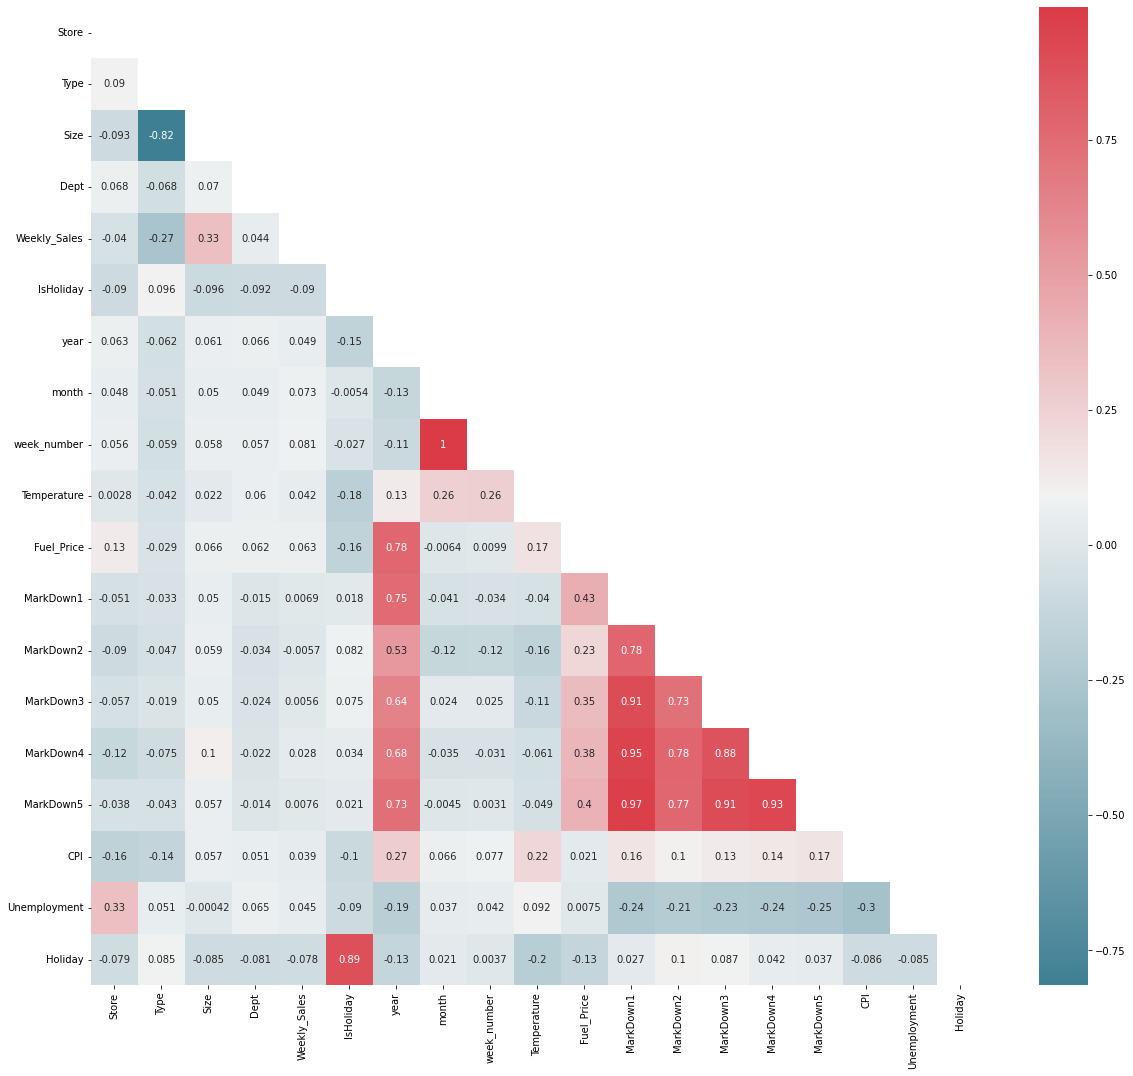

In [ ]:
# plot the correlation matrix using spearman method on a heatmap for easy interpretability
plt.figure(figsize = (20,18))

mask = np.triu(np.ones_like(data.corr('spearman'), dtype=bool))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(data.corr('spearman'),mask=mask, cmap=cmap, annot=True)

Store "Size" and "Type" have a high negative correlation of -0.8

"Week_number" and "Month" columns have a positive correlation with correlation coefficient of 1.  

The "Year", "Markdown 1-5" and "Fuel price" columns also have a high positive correlation with each other. 

The "Markdown 1-5" columns are also all correlated with each other - the data is all about the promotions Walmart is running. 

Holiday and IsHoliday columns also have high positive correlation - they contain the same type of data

Remove the correlated features by computing there VIFs and removing the columns with the highest VIF scores

High VIF score exceeding 5 or 10 shows there is a high multicolinearity.

In [ ]:
df = data.drop('Weekly_Sales', axis = 1)

In [ ]:
df.dtypes #the function requires that all data be interger or float type

Store             int64
Type              int64
Size              int64
Dept              int64
IsHoliday         int64
year              int64
month             int64
week_number       int64
Temperature     float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CPI             float64
Unemployment    float64
Holiday           int64
dtype: object

In [ ]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]

    return(vif)

In [ ]:
# calling the function
calc_vif(df)

,variables,VIF
0,Store,4.527812
1,Type,5.258601
2,Size,16.591166
3,Dept,3.108994
4,IsHoliday,3.998627
5,year,134.009353
6,month,607.294317
7,week_number,537.813502
8,Temperature,14.687422
9,Fuel_Price,57.858385


Remove all columns with VIF factor above 10[Size, year, month, week_number, fuel_price, temperature, CPI, Unemployment]

> Point to note is that all these features are quite important, so it is also prudent to look at if there is a difference in the modelling results when we select important features manually. 

In [ ]:
# remove the features with VIF factor above 10
df1 = df.drop(['Size', 'year', 'month', 'week_number', 'Fuel_Price', 'Temperature', 'CPI', 'Unemployment'], axis=1)
df1.head()

,Store,Type,Dept,IsHoliday,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,Holiday
0,1,0,1,1,0.0,0.0,0.0,0.0,0.0,1
1,1,0,1,1,0.0,0.0,0.0,0.0,0.0,0
2,2,2,2,2,2.0,2.0,2.0,2.0,2.0,2
3,1,0,1,0,0.0,0.0,0.0,0.0,0.0,0
4,1,0,1,0,0.0,0.0,0.0,0.0,0.0,0


In [ ]:
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = df1.columns
    vif["VIF"] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]

    return(vif)

# call the function once more to see the changes in the VIF
calc_vif(df1)

,variables,VIF
0,Store,2.665100
1,Type,1.880049
2,Dept,2.193055
3,IsHoliday,2.534226
4,MarkDown1,4.423742
5,MarkDown2,1.167730
6,MarkDown3,1.113626
7,MarkDown4,3.689898
8,MarkDown5,1.402520
9,Holiday,2.678436


The VIF Scores significantly reduce when we remove the columns that have high VIF scores. These columns will be the features used for multivariate regression. 

## **Linear Regression**

In [ ]:
# selecting features and labels
X = df1.values  #feature-set
y = data['Weekly_Sales'].values #labels

# scaling the features
X = StandardScaler().fit_transform(X) # normalizing the features

# splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

linear = LinearRegression()
# fit training sets onto the model
linear.fit(X_train, y_train)

# predict using the test set
y_linear_predict = linear.predict(X_test)

# cross-check on predictions made against the actual values
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_linear_predict})
predictions.head(10)

,Actual,Predicted
0,9526.04,20127.379481
1,26393.68,10490.153578
2,736.16,19352.020524
3,422.40,21094.512556
4,2.00,2312.586412
5,769.00,13023.842643
6,711.45,21136.691824
7,2894.54,14745.106345
8,4015.44,12383.963616
9,1.97,15430.248509


In [ ]:
# check the performance of the linear model
print('Mean Absolute Error of linear model:', metrics.mean_absolute_error(y_test, y_linear_predict))
print('MSE_linear:', metrics.mean_squared_error(y_test, y_linear_predict))
print('RMSE_linear:', np.sqrt(metrics.mean_squared_error(y_test, y_linear_predict)))
print('R_squared:', metrics.r2_score(y_test, y_linear_predict))

Mean Absolute Error of linear model: 14598.725381113074
MSE_linear: 476036287.9622592
RMSE_linear: 21818.255841433776
R_squared: 0.06997490071643786


>The root mean squared error is quite high, comparing it with 10% of the mean value of Weekly_Sales. The algorithm is not very accurate as we can see from the predictions made above. This may have been attributed by poor feature selection. The features used do not have a high enough correlation to the values being predicted as seen on the correlation heatmap.

The R^2 value is also very small -> model does not quite make the right predictions. 

In [ ]:
# compute the r_squared and adjusted r_squared scores for the linear model

# compute with sklearn linear_model, although could not find any function to compute adjusted-r-square directly from documentation
print (linear.score(X_test, y_test), 1 - (1-linear.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_train.shape[1]-1))

0.06997490071643786 0.0699013576910319


In [ ]:
# create the residual by substracting the test value from the predicted values
residuals = np.subtract(y_linear_predict, y_test)

# describe our residuals:
pd.DataFrame(residuals).describe()

# The mean is less than 0, indicating that our model performed poorly.
# This can be thoroughly investigated using the heteroskedasticity test


,0
count,126471.000000
mean,-46.393407
std,21818.292775
min,-399833.288009
25%,-5028.992431
50%,6287.881971
75%,13192.882737
max,38369.633777


**Heteroskedasticity test**

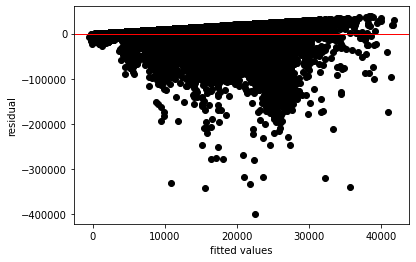

In [ ]:
# plot the residuals against the predicted values
plt.scatter(y_linear_predict, residuals, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

# The plot resembles a cone-shape which suggests that the data is heteroskedastic in nature. 


In [ ]:
import scipy as sp
test_result, p_value = sp.stats.bartlett(y_linear_predict, residuals)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(y_linear_predict)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)

# If the test_result is greater than the critical value, then we reject our null
# hypothesis. This would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept the null hypothesis that 
# the variance is homogeneous across our data

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!...There are no patterns to the variance of the data')


# This result is however not similar to the one from the plot.

# OLS regression assumes homoskedasticity, in which the variance of the residual term remains constant.

# This is however not the case as we can see from the plot of residuals that the data exhibits heteroskedasticity. 
# Therefore try out other regression models.  

inf
the variances are homogeneous!...There are no patterns to the variance of the data


## **Random Forest Regression**

In [ ]:
X1 = df1.values 
y1 = data['Weekly_Sales'].values

# normalize the features
X1 = StandardScaler().fit_transform(X1)

# splitting the data
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size = 0.3, random_state = 0)

random_forest = RandomForestRegressor(n_estimators = 10, random_state = 0)

# fit the training sets on the model
random_forest.fit(X_train, y_train)

# make predictions
y_randomf_predict = random_forest.predict(X_test)

# cross-check on predictions made against the actual values
randomf_predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_randomf_predict})
print(randomf_predictions.head(10))

print('RMSE_randomf:', np.sqrt(metrics.mean_squared_error(y_test, y_randomf_predict)))
print('R_squared_randomf:', metrics.r2_score(y_test, y_randomf_predict))

print('RMSE_linear:', np.sqrt(metrics.mean_squared_error(y_test, y_linear_predict)))
print('R_squared:', metrics.r2_score(y_test, y_linear_predict))

     Actual     Predicted
0   9526.04  15667.393484
1  26393.68  32611.922299
2    736.16    836.858455
3    422.40    559.186233
4      2.00      2.000000
5    769.00    906.905588
6    711.45   2301.798000
7   2894.54   2798.489672
8   4015.44   4194.699000
9      1.97    550.408000
RMSE_randomf: 6125.395740702247
R_squared_randomf: 0.9266968033929474
RMSE_linear: 21818.255841433776
R_squared: 0.06997490071643786


The value of the error metric RMSE decreases significantly compared to the Linear Regression model hence suggesting that the model performed quite well. When making predictions as we can see on the table, the predicted values are not so far away from the actual values which is also a great improvement from the Linear model. However, there are signs of overfitting because the R-squared value is 0.93 

In [ ]:
columns = data.drop('Weekly_Sales', 1)
columns.columns

<ipython-input-63-845fc4c64464>:1: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



Index(['Store', 'Type', 'Size', 'Dept', 'IsHoliday', 'year', 'month',
       'week_number', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
       'Holiday'],
      dtype='object')

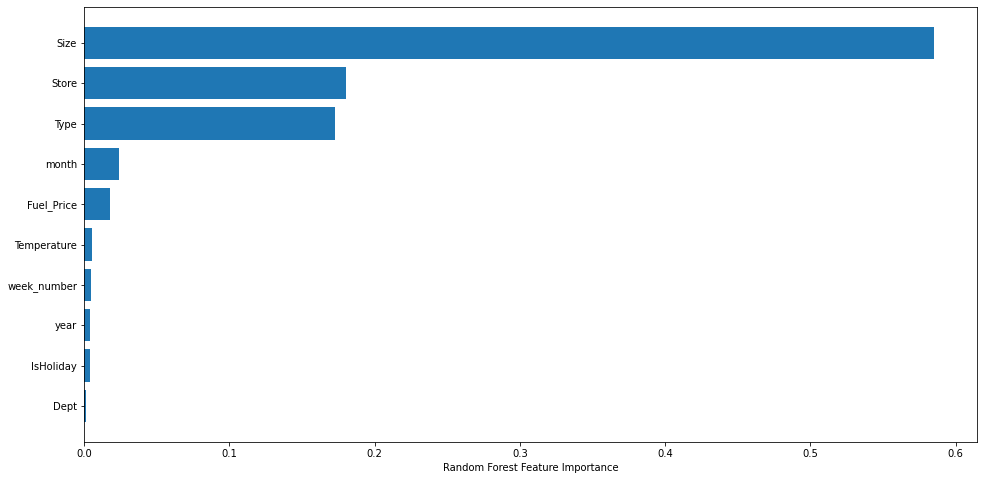

In [ ]:
sorted = random_forest.feature_importances_.argsort()
df_rf = pd.DataFrame([range(18)])
df_rf.columns = columns.columns

plt.figure(figsize=(16,8))
plt.barh(df_rf.columns[sorted], random_forest.feature_importances_[sorted])
plt.xlabel("Random Forest Feature Importance")

plt.show()

More importance is given to the store, size of the store and type of the store. More importance should have been given to features such as Holiday, CPI and Month as investigated previously. 

Is the performance different if we do not actually use the same dataset-selectively picking out the features-Randomforest models can perform well despite multicolinearity.

In [ ]:
X1 = data.drop('Weekly_Sales', 1).values
y1 = data['Weekly_Sales'].values

# normalize the features
X1 = StandardScaler().fit_transform(X1)

# splitting the data
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size = 0.3, random_state = 0)

random_forest = RandomForestRegressor(n_estimators = 10, random_state = 0)

# fit the training sets on the model
random_forest.fit(X_train, y_train)

# make predictions
y_randomf_predict = random_forest.predict(X_test)

# cross-check on predictions made against the actual values
randomf_predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_randomf_predict})
print(randomf_predictions.head(10))

print('RMSE_randomf:', np.sqrt(metrics.mean_squared_error(y_test, y_randomf_predict)))
print('R_squared_randomf:', metrics.r2_score(y_test, y_randomf_predict))

print('RMSE_linear:', np.sqrt(metrics.mean_squared_error(y_test, y_linear_predict)))
print('R_squared:', metrics.r2_score(y_test, y_linear_predict))

<ipython-input-66-9be5c6d5a82c>:1: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



     Actual  Predicted
0   9526.04  10921.965
1  26393.68  27842.408
2    736.16    706.450
3    422.40    502.233
4      2.00      2.000
5    769.00    932.744
6    711.45   1402.043
7   2894.54   2886.772
8   4015.44   3504.273
9      1.97    219.430
RMSE_randomf: 3867.173873487599
R_squared_randomf: 0.9707825703283863
RMSE_linear: 21818.255841433776
R_squared: 0.06997490071643786


The RMSE is quite lower than the previous Random Forest model and the R-squared(0.97) is also higher. The predictions are also more accurate compared to the previous model. 

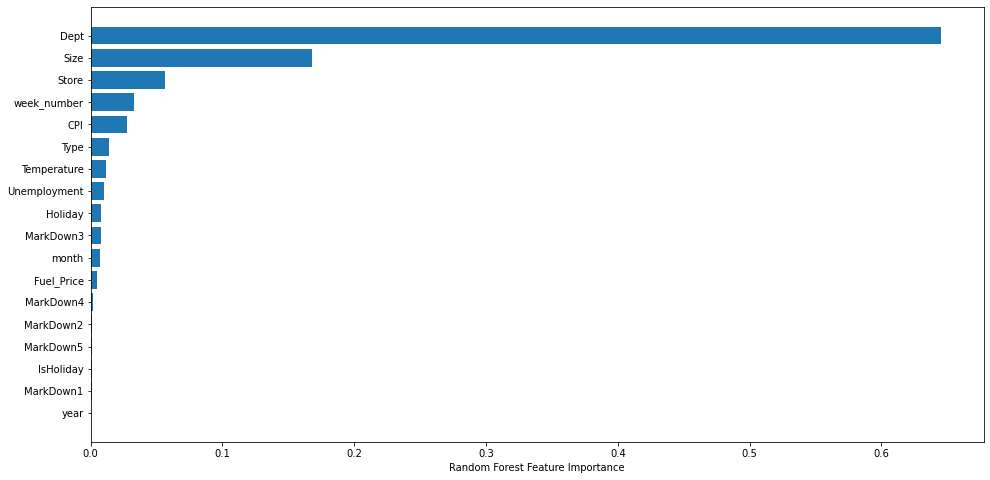

In [ ]:
sorted = random_forest.feature_importances_.argsort()
df_rf = pd.DataFrame([range(18)])
df_rf.columns = columns.columns

plt.figure(figsize=(16,8))
plt.barh(df_rf.columns[sorted], random_forest.feature_importances_[sorted])
plt.xlabel("Random Forest Feature Importance")

plt.show()

Features such as the Week number, CPI and temperature are given a little bit more importance. 

Checkout if there will be any difference to the other models such as gradient boost models

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
# gradient boosting model
gradient = GradientBoostingRegressor(n_estimators = 10, random_state=0)
# fit the model
gradient.fit(X_train, y_train)
# make predictions
y_grad_predict = gradient.predict(X_test)

gradient_predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_grad_predict})
print(gradient_predictions.head(10))

# check model performance
print(gradient.score(X_test, y_test))

print('RMSE_gradient:', np.sqrt(metrics.mean_squared_error(y_test, y_grad_predict)))
print('R_squared_gradient:', metrics.r2_score(y_test, y_grad_predict))

print('RMSE_randomf:', np.sqrt(metrics.mean_squared_error(y_test, y_randomf_predict)))
print('R_squared_randomf:', metrics.r2_score(y_test, y_randomf_predict))

print('RMSE_linear:', np.sqrt(metrics.mean_squared_error(y_test, y_linear_predict)))
print('R_squared:', metrics.r2_score(y_test, y_linear_predict))

     Actual     Predicted
0   9526.04  12399.092443
1  26393.68  17532.335996
2    736.16  12242.240609
3    422.40  12399.092443
4      2.00   8173.949467
5    769.00   8739.710970
6    711.45  12399.092443
7   2894.54  18909.195679
8   4015.44  11568.156972
9      1.97   8739.710970
0.3912606980260843
RMSE_gradient: 17651.77432017009
R_squared_gradient: 0.3912606980260843
RMSE_randomf: 3867.173873487599
R_squared_randomf: 0.9707825703283863
RMSE_linear: 21818.255841433776
R_squared: 0.06997490071643786


## **Explore performance of other models**

**LightGBM Model**

In [ ]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedKFold
from xgboost import XGBRegressor
from numpy import absolute

In [ ]:
# Create LightGBM dataset
lgbm_dataset = lgb.Dataset(X_train, y_train)
lgbm_eval = lgb.Dataset(X_test, y_test, reference=lgbm_dataset)

# set parameters
params = {
    'boosting_type': 'gbdt', #Gradient Boost Decision tree
    'objective': 'regression', # we want a regression
    'metric': 'rmse', # for feature selection - Lasso and Ridge
    'num_leaves': 100, # number of leaves
    'learning_rate': 0.01, 
    # 'feature_fraction': 0.9, # downsampling the features (r)
    # 'bagging_fraction': 0.7, # (r)
    # 'bagging_freq': 3, # (r)
    # 'verbose': 0 # (r)}
}

lgbm_model = lgb.train(params,
                lgbm_dataset,
                num_boost_round=250, #number of iterations
                # valid_sets=lgbm_eval,
                # callbacks=[lgb.early_stopping(stopping_rounds=5)] # stop
                ) 

lgbm_model.save_model('model.txt')



In [ ]:
# make predictions
y_lgbm_predict = lgbm_model.predict(X_test)

# y_lgbm_predict = lgbm_model.predict(X_test, num_iteration=lgbm_model.best_iteration)

# cross-check on predictions made against the actual values
lgbm_predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_lgbm_predict})
print(lgbm_predictions.head(10))

print('RMSE_lgbm_gr:', np.sqrt(metrics.mean_squared_error(y_test, y_lgbm_predict)))
print('R_squared_lgbm_gr:', metrics.r2_score(y_test, y_lgbm_predict))

print('RMSE_gradient:', np.sqrt(metrics.mean_squared_error(y_test, y_grad_predict)))
print('R_squared_gradient:', metrics.r2_score(y_test, y_grad_predict))

print('RMSE_randomf:', np.sqrt(metrics.mean_squared_error(y_test, y_randomf_predict)))
print('R_squared_randomf:', metrics.r2_score(y_test, y_randomf_predict))

print('RMSE_linear:', np.sqrt(metrics.mean_squared_error(y_test, y_linear_predict)))
print('R_squared:', metrics.r2_score(y_test, y_linear_predict))

     Actual     Predicted
0   9526.04   8504.571450
1  26393.68  32383.969406
2    736.16   4426.544955
3    422.40   3823.454621
4      2.00   2036.899360
5    769.00   3579.289468
6    711.45   5613.500315
7   2894.54   8019.791726
8   4015.44   7848.547560
9      1.97   3001.413325
RMSE_lgbm_gr: 7563.347008509519
R_squared_lgbm_gr: 0.8882409601045866
RMSE_gradient: 17651.77432017009
R_squared_gradient: 0.3912606980260843
RMSE_randomf: 3867.173873487599
R_squared_randomf: 0.9707825703283863
RMSE_linear: 21818.255841433776
R_squared: 0.06997490071643786


The RMSE for the gradient boosting model is slightly higher than the random forest model but lower than the linear regression model. It basically performs better than the linear regression model but the random forest model exhibits signs of overfitting. 

In [1]:
# df_t2 = pd.DataFrame({
#                 'Feature':columns,
#                 'Value':lgbm_model.feature_importance()
#               }).sort_values('Value')

# plt.figure(figsize=(16,10))
# plt.barh(df_t2['Feature'], df_t2['Value'], data=df_t2)
# plt.xlabel('LightGBM Feature Importance')

# plt.show()

In [ ]:
# sorted = lgbm_model.feature_importance().argsort()
# df_rf = pd.DataFrame([range(18)])
# df_rf.columns = columns.columns

# plt.figure(figsize=(16,8))
# plt.barh(df_rf.columns[sorted], lgbm_model.feature_importance()[sorted])
# plt.xlabel("LightGBM Feature Importance")

# plt.show()
# ****
# figure out how to plot the feature importances for the lightGBM model

In [ ]:

# df_gradient = pd.DataFrame({
#                 'Feature':columns,
#                 'Value':lgbm_model.feature_importance()
#               }).sort_values('Value')

# plt.figure(figsize=(16,10))
# plt.barh(df_gradient['Feature'], df_gradient['Value'], data=df_gradient)
# plt.xlabel('LightGBM Feature Importance')

# plt.show()

**XGBoost Model**

# **Time Series forecasting using ARIMA Model**


ARIMA forecasting algorithm based on the idea that the information in the past values of the time series can alone be used to predict the future values.

ARIMA Modelling assumes that the data is non-seasonal, exhibits patterns and is not a random white noise. 

ARIMA - Auto Regressive Integrated Moving Average 

## **Determine the p,d and q terms**

**p term** is the order of AR term

**q term** is the order of the MA term

**d term** is the minimum number of differencing that needs to be done to achieve stationary series. 

**Why Stationary?** To remove any obvious correlation and collinearity with the past data. In stationary time-series data, the properties or value of a sample observation does not depend on the timestamp at which it is observed.

In [ ]:
data.head()


,Store,Type,Size,Dept,Weekly_Sales,IsHoliday,year,month,week_number,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Holiday
0,1,0,151315,1,24924.50,1,2010,2,5,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,1
1,1,0,151315,1,46039.49,1,2010,2,6,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,0
2,1,0,151315,1,41595.55,0,2010,2,7,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,0
3,1,0,151315,1,19403.54,0,2010,2,8,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,0
4,1,0,151315,1,21827.90,0,2010,3,9,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,0


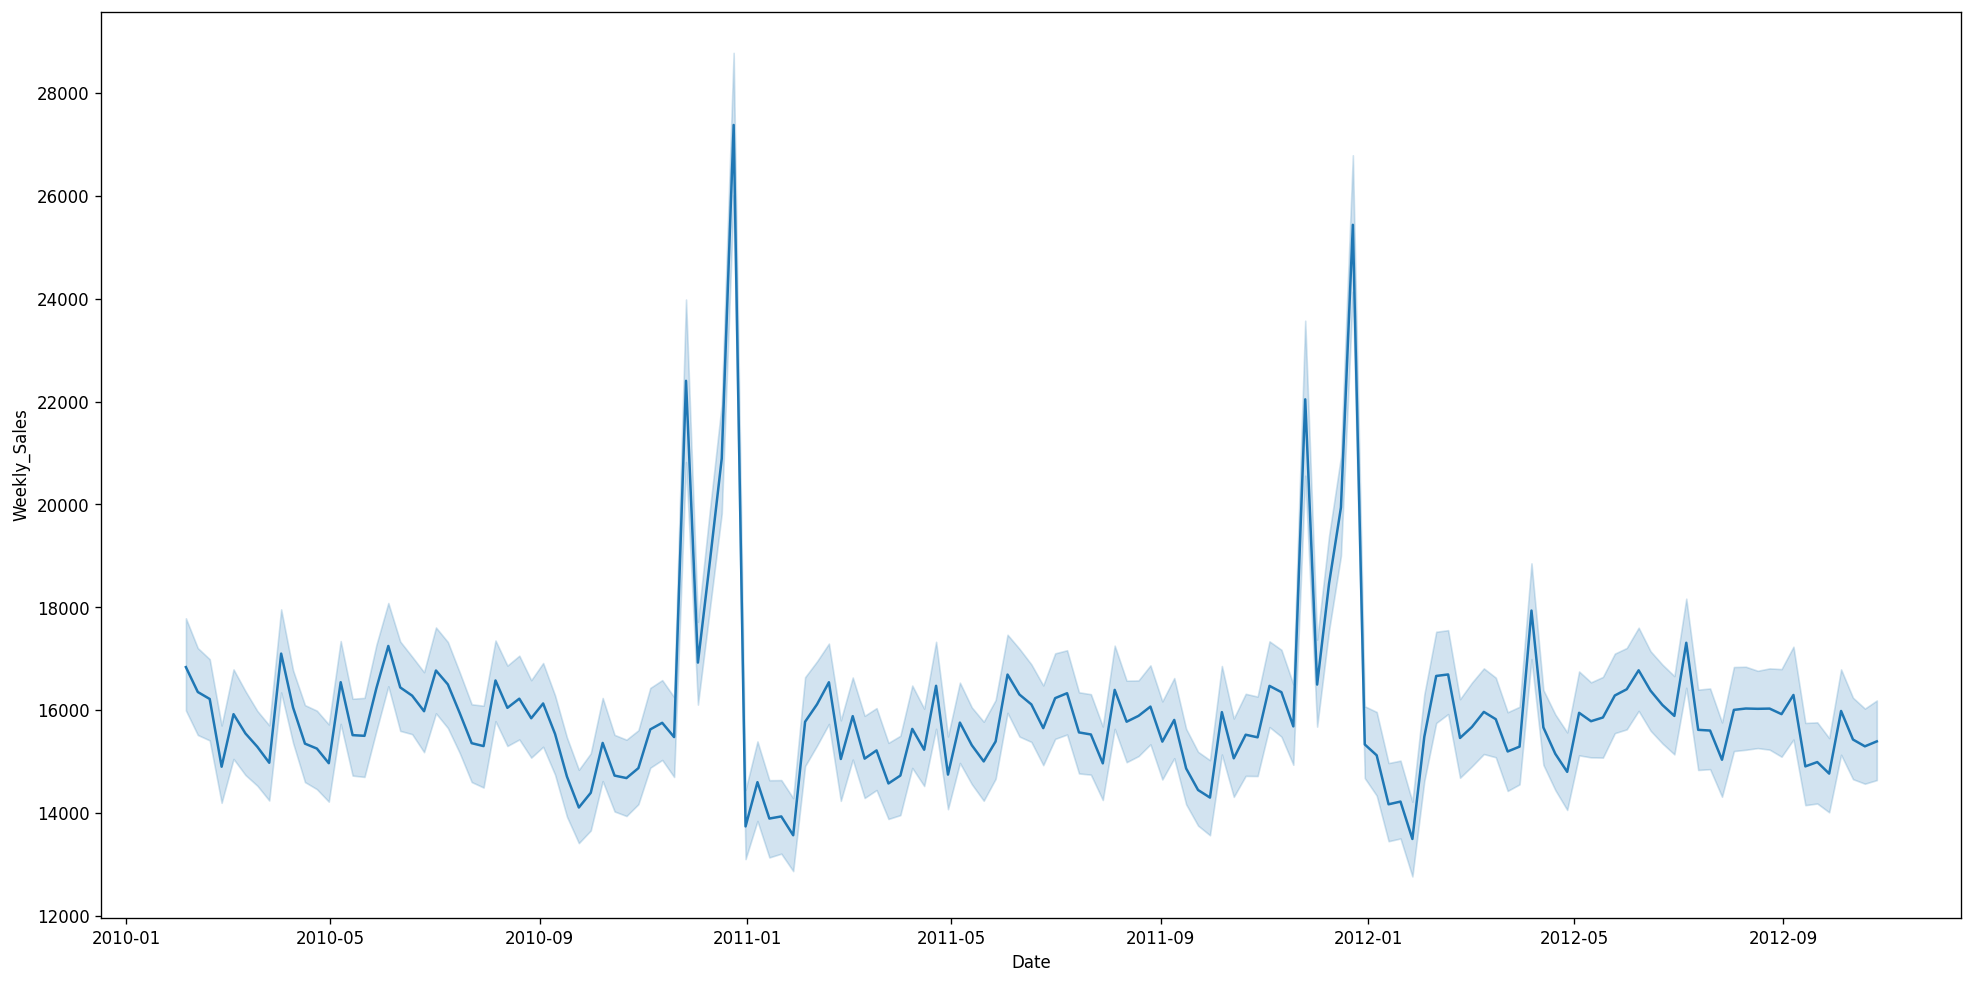

In [ ]:
# plot the weekly sales data to check for trends and seasonality
plt.figure(figsize=(20,10))

sns.lineplot(x=arima['Date'], y=arima['Weekly_Sales'])
plt.show()

The line plot shows how the Weekly Sales fluctuate over time with peaks toward the end of each year because of the Thanksgiving and Christmas holidays. 

In [ ]:
# extract only the "Weekly_Sales" data
df_arima = data['Weekly_Sales']
df_arima.columns = ['weekly_sales'] #rename column name
df_arima.to_csv("arima_data.csv") #save the data to csv format

# read the data
arima_data = pd.read_csv("arima_data.csv", names=['value'], header=0)
arima_data.head()

,value
0,24924.50
1,46039.49
2,41595.55
3,19403.54
4,21827.90


**Find the order of differencing d term**

In [ ]:
# First check if the series is stationary using the Augmented Dickey Fuller(ADF) test
# The null hypothesis of the ADF test is that the time series is non-stationary. 
# So, if the p-value of the test is less than the significance level (0.05) then you reject the null hypothesis 
# and infer that the time series is indeed stationary.

#  IF P Value > 0.05 we go ahead with finding the order of differencing.

In [ ]:
# from statsmodels.tsa.stattools import adfuller

# result = adfuller(arima_data.value.dropna())
# print('p-value: ', result[1])

# result = adfuller(arima_data.value.diff().dropna())
# print('p-value: ', result[1])

# result = adfuller(arima_data.value.diff().diff().dropna())
# print('p-value: ', result[1])

# could not compute this because of RAM - consumed all the RAM and the session crashed. 

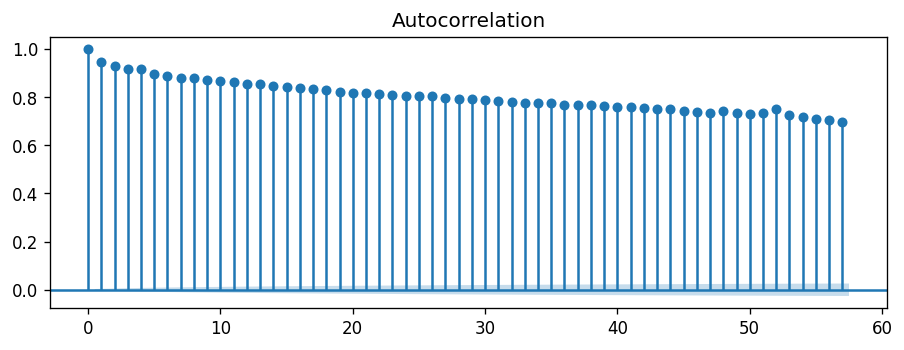

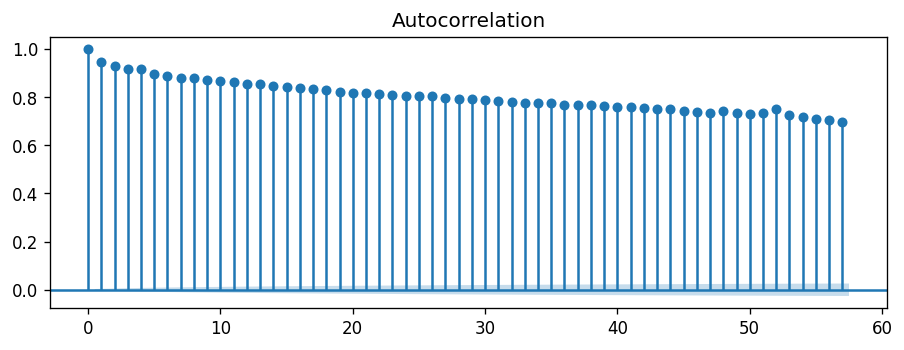

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(arima_data.value)

In [ ]:
# plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})
# #all plots to share x axis and be arranged 3 plots vertically, 2 plots horizontally
# fig, axes = plt.subplots(3, 2, sharex = True) 

# # Plot the original series
# axes[0,0].plot(arima_data.value);axes[0,0].set_title("Original")
# plot_acf(arima_data.value, ax = axes[0,1]) #autocorrelation plot for the original series

# # 1st differencing
# axes[1,0].plot(arima_data.value);axes[1,0].set_title("1st order differencing")
# plot_acf(arima_data.value.diff().dropna(), ax = axes[1,1])

# # 2nd differencing
# axes[2,0].plot(arima_data.value);axes[2,0].set_title("2nd order differencing")
# plot_acf(arima_data.value.diff().diff().dropna(), ax = axes[2,1])

# plt.show()

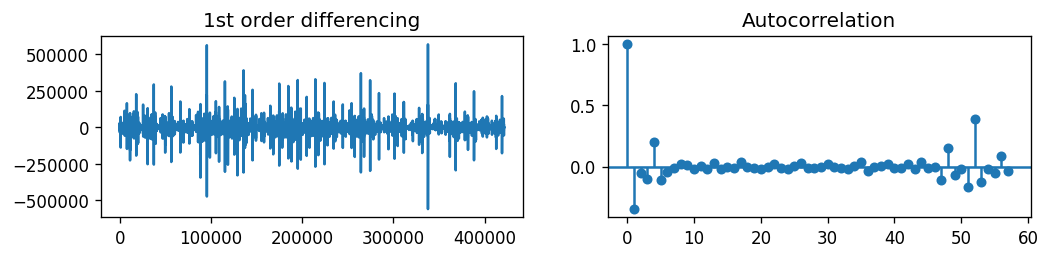

In [ ]:
f = plt.figure(figsize=(10,2))
ax1 = f.add_subplot(121)
ax1.set_title('1st order differencing')
ax1.plot(arima_data.value.diff())

ax2 = f.add_subplot(122)
plot_acf(arima_data.value.diff().dropna(), ax=ax2)
plt.show()

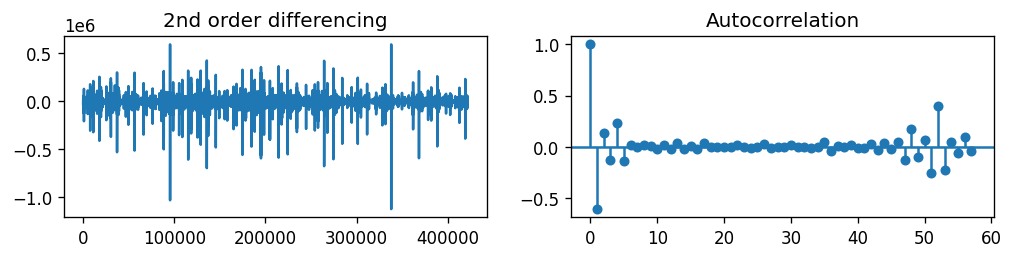

In [ ]:
f = plt.figure(figsize=(10,2))
ax1 = f.add_subplot(121)
ax1.set_title('2nd order differencing')
ax1.plot(arima_data.value.diff().diff())

ax2 = f.add_subplot(122)
plot_acf(arima_data.value.diff().diff().dropna(), ax=ax2)
plt.show()

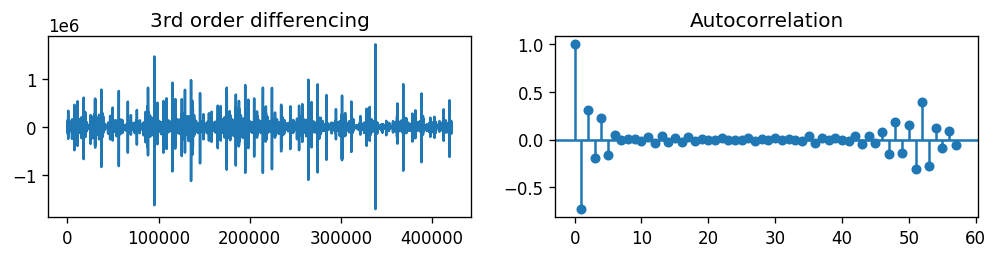

In [ ]:
f = plt.figure(figsize=(10,2))
ax1 = f.add_subplot(121)
ax1.set_title('3rd order differencing')
ax1.plot(arima_data.value.diff().diff().diff())

ax2 = f.add_subplot(122)
plot_acf(arima_data.value.diff().diff().diff().dropna(), ax=ax2)
plt.show()

From the above plots, the time series reaches stationarity with one order of differencing. Looking at the autocorrelation plot for the 2nd differencing, the lag goes into the far negative zone fairly quickly, which indicates the series might be overly differenced. Hence **d = 1**






**Finding the order of p (Autoregressive term).**



>Inspect the partial autocorrelation plot - it measures the correlation between the time-series data and a certain lag. 

Based on the presence or absence of correlation, we can determine whether the lag is needed in the AR term or not.

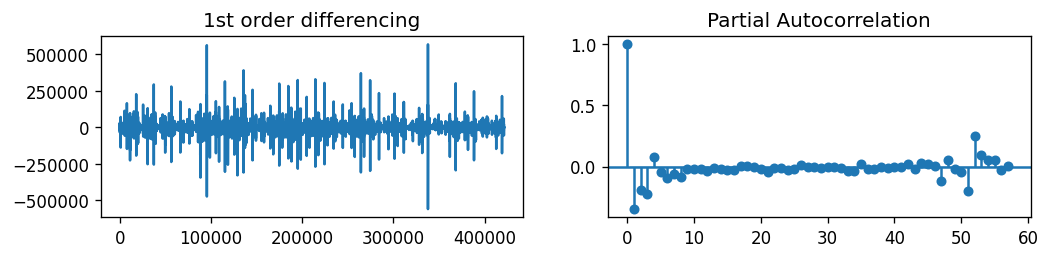

In [ ]:
f = plt.figure(figsize=(10,2))
ax1 = f.add_subplot(121)
ax1.set_title('1st order differencing')
ax1.plot(arima_data.value.diff())

ax2 = f.add_subplot(122)
plot_pacf(arima_data.value.diff().dropna(), ax=ax2)
plt.show()

In [ ]:
# # PACF plot of 1st differenced series
# plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

# fig, axes = plt.subplots(1, 2, sharex=True)
# axes[0].plot(arima_data.value.diff()); axes[0].set_title('1st Differencing')
# axes[1].set(ylim=(0,5))
# plot_pacf(arima_data.value.diff().dropna(), ax=axes[1])

# plt.show()

From the plot, the PACF lag 1 is quite significant. Hence **p=1**

**Finding the order of q term.**


“q” can be estimated by looking at the ACF plot. Looking at the number of lags crossing the threshold, we can determine how much of the past would be significant enough to consider for the future. The ones with high correlation contribute more and would be enough to predict future values. From the plots above, the moving average (MA) parameter can be set to 2.

## **Build the ARIMA Model**

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

arima = ARIMA(arima_data.value, order=(1,1,2))
arima_model = arima.fit()
print(arima_model.summary)


# https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/
# https://www.projectpro.io/article/how-to-build-arima-model-in-python/544

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)


